In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
data = mnist.load_data()

In [3]:
train_X = train_X.reshape((60000,28*28))
test_X = test_X.reshape((10000,28*28))

In [4]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(train_X)
standardized_data2 = StandardScaler().fit_transform(test_X)
print(standardized_data.shape)
print(standardized_data2.shape)

(60000, 784)
(10000, 784)


In [5]:
train_data = standardized_data
covar_matrix = np.matmul(train_data.T , train_data)

In [6]:
from scipy.linalg import eigh

In [7]:
values, vectors = eigh(covar_matrix, eigvals=(734,783))

In [8]:
print('Shape of eigen vectors = ',vectors.shape)

Shape of eigen vectors =  (784, 50)


In [9]:
vectors = vectors.T

In [10]:
print('Updated shape of eigen vectors = ',vectors.shape)

Updated shape of eigen vectors =  (50, 784)


In [11]:
import matplotlib.pyplot as plt
new_coordinates0 = np.matmul(vectors, train_data.T)

In [12]:
import pandas as pd
new_coordinates = np.vstack((new_coordinates0,train_y)).T
print(new_coordinates.shape)

(60000, 51)


In [13]:
df2 = pd.DataFrame(data=new_coordinates)
print(df2.shape)

(60000, 51)


In [35]:
df2

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-0.084946,3.363448,-0.219247,0.104338,-2.638280,2.050031,2.188262,-2.046510,-1.981558,-1.475160,...,-1.052314,-1.393473,-0.336139,-0.951616,-0.985347,8.051329,-0.067560,-4.814790,-0.922159,5.0
1,1.268250,0.406323,0.775051,-0.360583,0.745531,1.268478,0.233061,1.086760,0.121484,1.756084,...,-0.198393,-3.135456,0.272279,5.144664,0.834795,1.668321,3.447910,-7.754403,8.708977,0.0
2,1.441632,-5.109337,-0.820063,2.340011,2.713563,-2.417268,1.473883,4.666628,7.306954,-1.879901,...,2.170118,-3.992473,-18.691539,-2.291390,4.092456,-1.725066,6.184114,9.431338,2.328389,4.0
3,0.215556,0.351833,-0.064618,-1.259928,0.617940,0.772846,0.554524,-0.513546,-0.474883,0.621118,...,-0.624820,4.600462,-1.561415,-3.461544,5.627325,0.461041,-3.690851,-3.746318,-6.582173,1.0
4,0.420228,0.872258,-0.964023,-2.008459,0.364974,2.400800,1.216506,0.128289,-0.387970,0.188496,...,0.012948,3.206010,0.580065,0.612565,-1.608842,-1.459654,6.277947,3.133297,-5.183251,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.881929,1.145690,0.377981,2.161909,1.846106,0.282380,1.623903,0.538163,0.315564,-0.513245,...,-1.569236,3.662751,0.222213,-2.901570,-0.645579,4.688222,-0.375261,-5.119129,-2.039339,8.0
59996,-1.680356,-1.589847,2.196788,0.320174,1.315994,-0.407490,-0.838401,-0.116931,0.831067,0.464824,...,-7.245211,-0.924782,-3.967956,-1.240176,-1.009540,8.397312,-3.507305,-6.498440,0.607841,3.0
59997,1.673411,1.285859,1.360945,0.601647,0.205250,-1.435252,1.665739,-0.555149,0.635605,-1.703291,...,2.734803,2.475236,-1.697904,2.879084,-1.361753,7.503987,3.806199,-3.230564,-3.777212,5.0
59998,0.802732,-1.426491,0.492740,1.253039,-1.042127,-0.988343,2.940759,5.056170,-1.460780,-1.027916,...,2.749771,-3.799631,-3.642969,5.067463,-0.925236,-7.150954,-0.006951,-4.948125,1.722369,6.0


In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df2)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.846s...
[t-SNE] Computed neighbors for 60000 samples in 406.169s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

In [20]:
tsne_results.shape

(60000, 2)

In [21]:
tsne_results

array([[ 3.0447574 ,  0.76323724],
       [ 5.646128  , -0.30922   ],
       [-2.034686  , -2.8279903 ],
       ...,
       [ 2.8332343 ,  1.810448  ],
       [ 4.1450524 , -1.6562524 ],
       [ 1.6257261 ,  3.679802  ]], dtype=float32)

In [33]:
tsne_results.shape

(60000, 2)

In [38]:
import pandas as pd
new_coordinates3 = np.vstack((tsne_results.T,df2[50])).T
print(new_coordinates3.shape)

(60000, 3)


In [39]:
dataframe3 = pd.DataFrame(data=new_coordinates3, columns=('1st_principal', '2nd_principal', 'label'))
print(dataframe3.head())

   1st_principal  2nd_principal  label
0       3.044757       0.763237    5.0
1       5.646128      -0.309220    0.0
2      -2.034686      -2.827990    4.0
3       0.683300       5.469503    1.0
4      -3.352384      -1.636377    9.0


C:\Users\Dante\Desktop\ML\sample\env\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


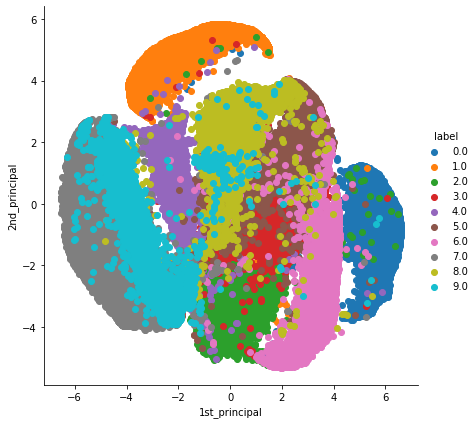

In [40]:
import seaborn as sn
sn.FacetGrid(dataframe3, hue='label', size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()